# Image Processing SS 20 - Assignment - 07

### Deadline is 10.6.2020 at 11:55am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from skimage.data import chelsea
from skimage.color import rgb2gray
    
from numpy.fft import fft2 as numpy_fft2, ifft2 as numpy_ifft2

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

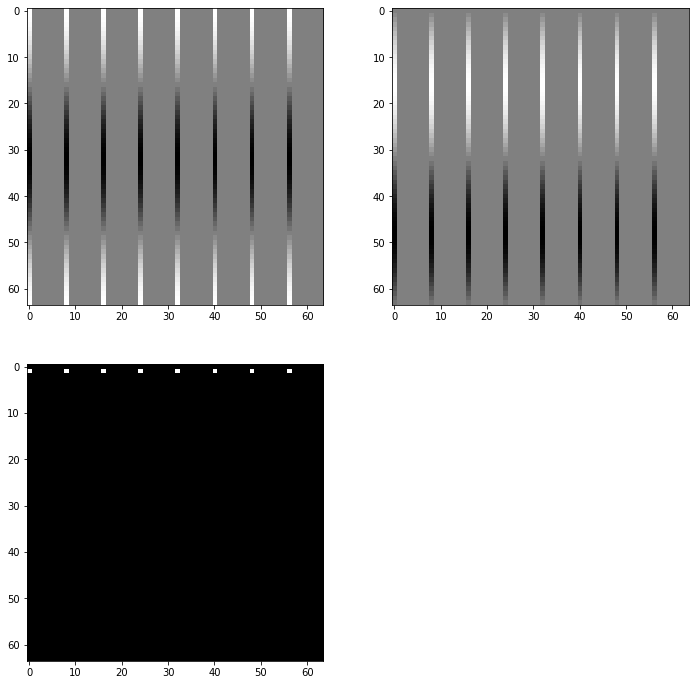

In [3]:
# Playground to get some intuition for 2d fourier transformation
ft = np.zeros((64,64))

# set some random coefficents and see what happens
ft [1, 0:63:8]= 1
#ft[0, 1] = 1

#for t in ft:
#    print(t)
#ft[10, 10] = 1

plt.subplot(221)
plt.imshow(np.real(numpy_ifft2(ft)), cmap='gray')
plt.subplot(222)
plt.imshow(np.imag(numpy_ifft2(ft)), cmap='gray')
plt.subplot(223)
plt.imshow(np.real(ft), cmap='gray')
plt.show()

# Exercise 1 - 2D DFT - 2 Points
Implement the 2D Discrete Fourier Transformation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix). You can use your code from the last assignment to compute the dct matrix.

<function matplotlib.pyplot.show(*args, **kw)>

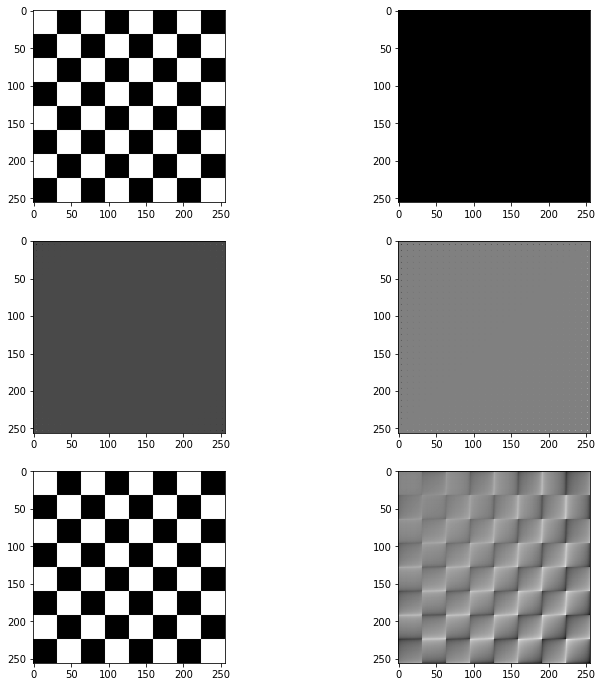

In [4]:
# my DFT Matrix code from assignment 6
def dft_matrix(n):
    omega = np.exp( - 2 * np.pi * 1J / n )
    W = np.ones((n,n), dtype=complex)
    
    for x in range(n):
        for y in range(n):
             # W = (omega**(j*k)) / sqrt(N) where j, k= 0..N-1
            W[x, y] = omega**(x*y)
    return W / np.sqrt(n) 

# new code for inverse DFT Matrix
def dft_inverse(n):
    omega = np.exp(2 * np.pi * 1J / n )
    W = np.ones((n,n), dtype=complex)
    
    for x in range(n):
        for y in range(n):
             # W = (omega**(j*k)) / sqrt(N) where j, k= 0..N-1
            W[x, y] = omega**(x*y)
    return W / n 

def dft2d(img):
    """
    Returns the 2d discrete fourier transformation
    """
    # your code here
    # die Dft Matrix braucht nur so viele Spalten, wie das Bild Reihen hat
    size = max(img.shape[0],img.shape[0])
    #size = max(img.shape[0], img.shape[0])

    W = dft_matrix(size)
    
    dft = np.dot(W, img)
    dft2d = np.dot(dft, W)
    return dft2d
    
    # check solution with numpy
    #return numpy_fft2(img)

def inv_dft2d(x):
    """
    Returns the 2d inverse discrete fourier transformation
    """
    # your code here
    size = max(x.shape[0],x.shape[0])
    #size = max(img.shape[0], img.shape[0])

    W_inv = dft_inverse(size)
    
    dft_inv = np.dot(W_inv, x)
    dft2d_inv = np.dot(dft_inv, W_inv)
    return dft2d_inv
    
    # check solution with numpy
    #return numpy_ifft2(x)


def chess_board(n=8, field_size=32):
    board = np.zeros((n*field_size, n*field_size))
    s = field_size
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*s:(i+1)*s, j*s:(j+1)*s] = 1
    return board

# plot all functions: chess board, dft2d and inverse 
plt.subplot(321)
plt.imshow(np.real(chess_board()), cmap='gray')
plt.subplot(322)
plt.imshow(np.imag(chess_board()), cmap='gray')
plt.subplot(323)
plt.imshow(np.real(dft2d(chess_board())), cmap='gray')
plt.subplot(324)
plt.imshow(np.imag(dft2d(chess_board())), cmap='gray')
plt.subplot(325)
plt.imshow(np.real(inv_dft2d(dft2d(chess_board()))), cmap='gray')
plt.subplot(326)
plt.imshow(np.imag(inv_dft2d(dft2d(chess_board()))), cmap='gray')
plt.show

# Exercise 2 - High and Low Pass filter with the 2D fourier transformation - 3 Points

In [5]:
def high_pass(img_ft, n):
    """Removes the low frequencies
    Low-Pass Filtering (Blurring)"""
    ft = img_ft.copy()
    ft[:n, :n] = 0
    ft[-n:, :n] = 0
    ft[-n:, -n:] = 0
    ft[:n, -n:] = 0
    return ft

def low_pass(img_ft, n):
    """Removes the high frequencies
    High pass filters are usually used for sharpening."""
    # your code here
    ft = img_ft.copy()
    # remove center, n is the number of elements that should remain after filter was applied
    # first  take all rows and cut the columns
    ft[:, n:-n] = 0
    # invert mathematic 
    ft[n:-n, :] = 0
    return ft

def band_pass(img_ft, low, high):
    """Only preserve the frequencies between low and high
    Bandpass filtering can be used to enhance edges (suppressing low frequencies) 
    while reducing the noise at the same time (attenuating high frequencies). 
    """
    # your code here
    # cut the low frequencies
    # high_pass: ---low+++++++++++++
    # low_pass:  +++++++++++++high----
    ft = img_ft.copy()
    ft = high_pass(img_ft, low)
    ft = low_pass(img_ft, high)
    return ft
    
def inv_dft_and_plot(img_ft):
    plt.imshow(np.real(inv_dft2d(img_ft)), cmap='gray')
    #plt.imshow(np.real(img_ft), cmap='gray')
    plt.show()

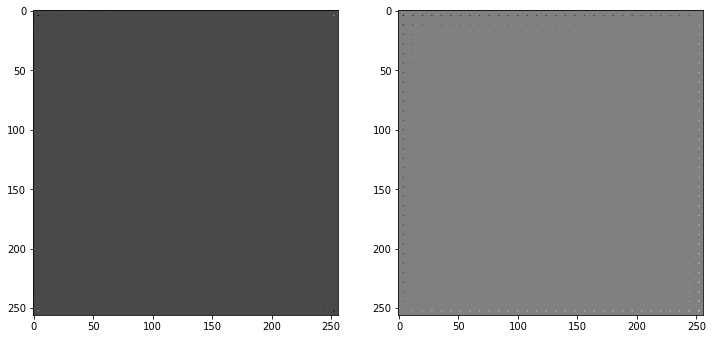

In [6]:
chess_board_ft = dft2d(chess_board())

# display frequency domain of the chess_board
plt.subplot(121)
plt.imshow(np.real(chess_board_ft), cmap='gray')
plt.subplot(122)
plt.imshow(np.imag(chess_board_ft), cmap='gray')
plt.show()

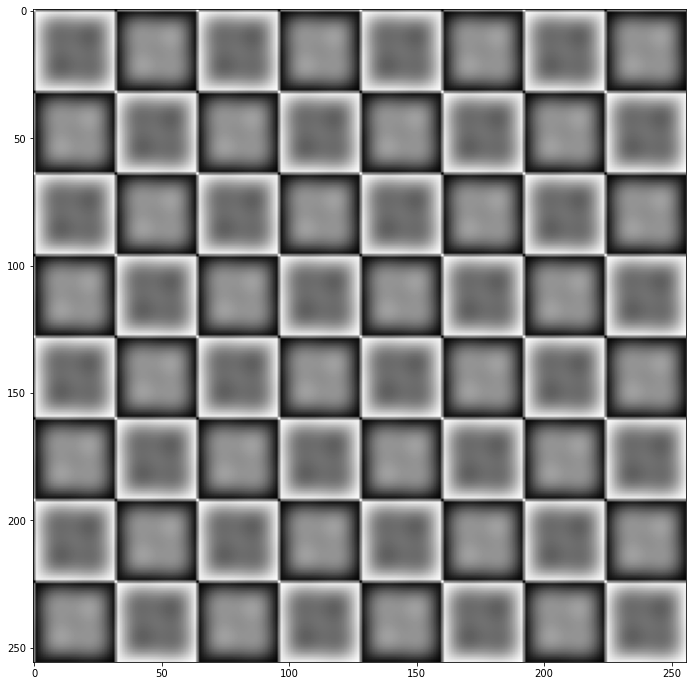

In [7]:
# remove the low frequencies of the chess board
chess_high_feq = high_pass(chess_board_ft, 12)
inv_dft_and_plot(np.real(chess_high_feq))

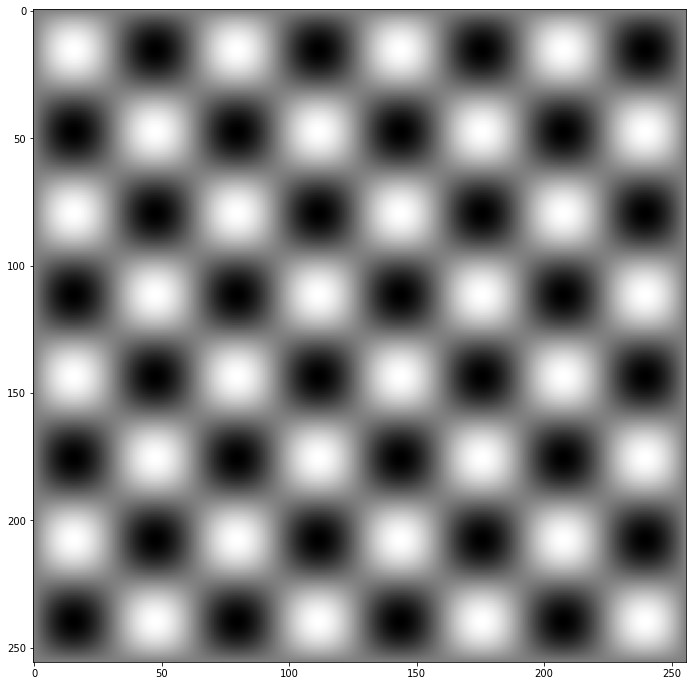

In [8]:
# remove the high frequencies of the chess board
chess_low_feq = low_pass(chess_board_ft, 10)
inv_dft_and_plot(chess_low_feq)

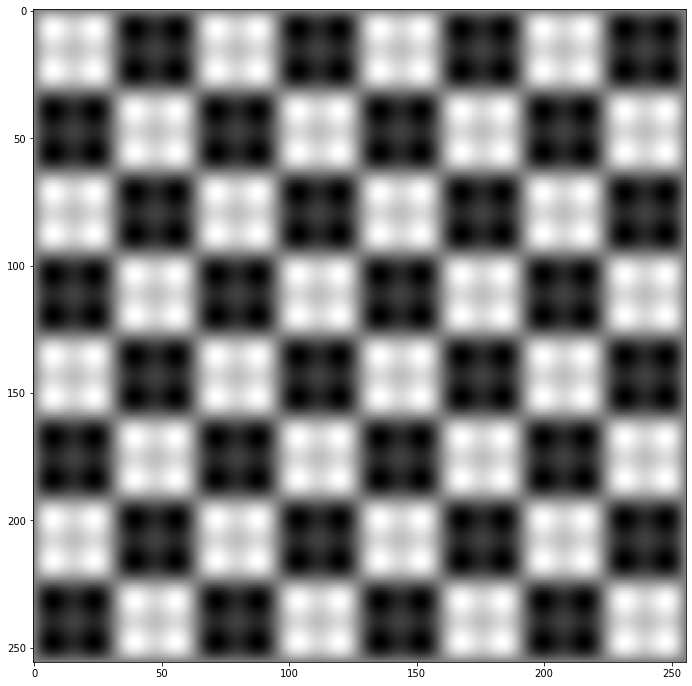

In [9]:
# remove the high and low frequencies of the chess board
chess_medium_feq = band_pass(chess_board_ft, 5, 15)
inv_dft_and_plot(chess_medium_feq)

In [10]:
img = rgb2gray(chelsea() / 255)
# filter all frequencies corresponding to the coefficients between 48 and 128.
# your code here
cat_ft = dft2d(img)
cat_low = low_pass(cat_ft, 48)
cat_high = high_pass(cat_ft, 128)
catty = cat_low + cat_high
inv_dft_and_plot(catty)
# inv_dft_and_plot()

ValueError: shapes (300,451) and (300,300) not aligned: 451 (dim 1) != 300 (dim 0)

# Exercise 3 - FFT - 5 Points

Implement the fast fourier transformation. 
Use the [Cooley-Tukey](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm) algorithm.

In [116]:
def fft_recursion(x):
    N = len(x)
    # exit from recursion
    if N <= 1: 
        return x
    
    even = fft_recursion(x[0::2])
    odd =  fft_recursion(x[1::2])
    
    T = [np.exp(-2j*np.pi*k/N) * odd[k] for k in range(N//2)]
    
    return [even[k] + T[k] for k in range(N//2)] + [even[k] - T[k] for k in range(N//2)]

    
def fft(x):
    """
    Computes the fast fourier transformation of x
    
    From lecture slides:
    The 2D-DFT formula can be decomposed in two 1D-DFTs 
    - where one DFT transforms the rows of the image and afterwards one DFT transforms the columns.
    
    Given a line - Summation over all M line elements (each summand is weighted by a unit root value)
    Given a row - Summation over all N row elements (each summand is weighted by a unit root value):
    """ 
    
    #x_flat = x.copy()
    #x_flat.flatten('C') # shape 1
       
    X_1 = np.zeros(x.shape, dtype ='complex')
    X = np.zeros(x.shape, dtype ='complex')
    
    X_1 = np.apply_along_axis(fft_recursion, 1, x)
    X = np.apply_along_axis(fft_recursion, 0, X_1)
    return X
    

In [121]:
from skimage.data import astronaut
img = rgb2gray(astronaut() / 255)

#img = rgb2gray(chelsea() / 255)
print(img.shape)
fft_img = fft(img)

(512, 512)


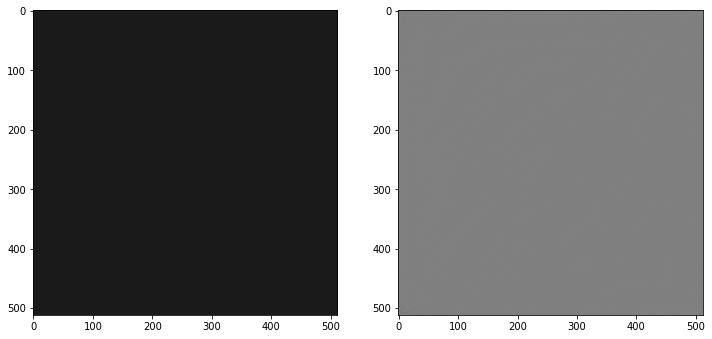

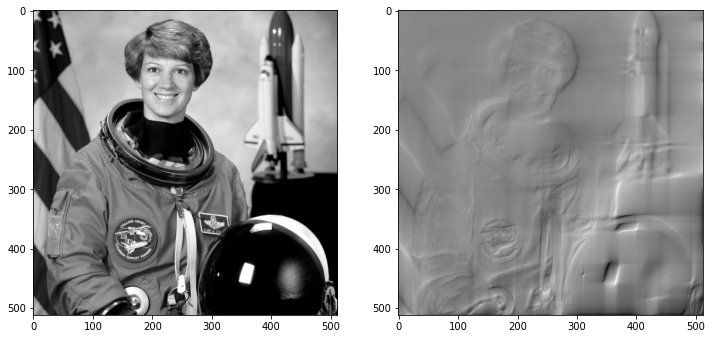

In [122]:
plt.subplot(121)
plt.imshow(np.real(fft_img), cmap='gray')
plt.subplot(122)
plt.imshow(np.imag(fft_img), cmap='gray')
plt.show()

plt.subplot(121)
plt.imshow(np.real(inv_dft2d(fft_img)),cmap="gray")
plt.subplot(122)
plt.imshow(np.imag(inv_dft2d(fft_img)),cmap="gray")
plt.show()